# Rabbit Game
#### Squid Game's Annoying Little Brother

The rabbit game is a programming problem where you are tasked with finding a rabbit hidden amongst some holes in the ground.

## Rules

1. There are a finite number of holes.
2. You can only look in one hole at a time.
3. Every time you look at a hole and don't find the rabbit the rabbit jumps to a hole adjacent to where he was previously.
4. The rabbit cannot jump from the first hole to the last.

In [107]:
import random
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

## Setting up the Game

In [19]:
def game(guess_method):
    hole_upper_limit = 100
    hole_bottom_limit = 0
    rabbit_position = random.randint(0, hole_upper_limit)
    turn = 0
    max_turns = 1000
    arr = []
    guess = guess_method(hole_bottom_limit, hole_upper_limit, max_turns)
    while turn < max_turns:
        turn += 1
        rabbit_position = hop(rabbit_position, hole_upper_limit, hole_bottom_limit)
        arr.append([turn, rabbit_position])
    df = pd.DataFrame(arr, columns=['Turn', 'Rabbit Position'])
    df['Guess'] = guess
    return df

In [20]:
def hop(rabbit_position, hole_upper_limit, hole_bottom_limit):
    if rabbit_position == hole_bottom_limit:
        rabbit_position += 1
    elif rabbit_position == hole_upper_limit:
        rabbit_position -= 1
    else:
        if random.randint(0, 1) == 1:
            rabbit_position += 1
        else:
            rabbit_position -= 1
    return rabbit_position

## Defining Inspection Methods

#### Completely Random

In [6]:
def random_inspect(bottom_limit, top_limit, max_turns):
    result = []
    i = 0
    while i < max_turns:
        i += 1
        result.append(random.randint(bottom_limit, top_limit))
    return result

#### Stay

In [7]:
def stay(bottom_limit, top_limit, max_turns):
    result = []
    i = 0
    random_number = random.randint(bottom_limit, top_limit)
    while i < max_turns:
        i += 1
        result.append(random_number)
    return random_number

#### Random w/ Optimal Start

In [8]:
def random_with_optimal_start(bottom_limit, top_limit, max_turns):
    result = []
    result.append(1)
    result.append(1)
    i = 2
    while i < max_turns:
        i += 1
        result.append(random.randint(bottom_limit, top_limit))
    return result

#### Optimal Start Binary Oscillation

In [28]:
def optimal_start_binary_oscillation(bottom_limit, top_limit, max_turns):
    oscillation = ['even', 'odd']
    if bottom_limit % 2 == 0 and top_limit % 2 == 0:
        oscillation_start = oscillation[0]
    elif bottom_limit % 2 != 0 and top_limit % 2 != 0:
        oscillation_start = oscillation[1]
    else:
        oscillation_start = oscillation[random.randint(0, 1)]
    
    evens = []
    odds = []
    for number in range(bottom_limit, top_limit):
        if number % 2 == 0:
            evens.append(number)
        else:
            odds.append(number)
    
    result = []
    result.append(1)
    result.append(1)
    i = 2
    k = 0
    
    if max_turns % 2 != 0 and oscillation_start == 'even':
        even_half_max_turns = math.ceil(max_turns / 2)
        odd_half_max_turns = max_turns / 2
    elif max_turns % 2 != 0 and oscillation_start == 'odd':
        odd_half_max_turns = math.ceil(max_turns / 2)
        even_half_max_turns = max_turns / 2
    else:
        odd_half_max_turns = max_turns / 2
        even_half_max_turns = max_turns / 2
    
    if oscillation_start == 'even':
        while i < even_half_max_turns:
            i += 2
            for osc in range(1):
                result.append(random.choice(evens))
                result.append(random.choice(odds))
        while k < odd_half_max_turns:
            k += 2
            for osc in range(1):
                result.append(random.choice(odds))
                result.append(random.choice(evens))
    elif oscillation_start == 'odd':
        while i < odd_half_max_turns:
            i += 2
            for osc in range(1):
                result.append(random.choice(odds))
                result.append(random.choice(evens))
        while k < even_half_max_turns:
            k += 2
            for osc in range(1):
                result.append(random.choice(evens))
                result.append(random.choice(odds))
    else:
        return
    return result

## Running the Game

#### Random Inspect Method

In [49]:
random_inspect_result = game(random_inspect)
print(random_inspect_result)

     Turn  Rabbit Position  Guess
0       1                2     23
1       2                3     56
2       3                4     89
3       4                3     85
4       5                4      7
..    ...              ...    ...
995   996                5     26
996   997                6     35
997   998                5     84
998   999                4     41
999  1000                5     67

[1000 rows x 3 columns]


#### Stay Method

In [23]:
stay_result = game(stay)
print(stay_result)

     Turn  Rabbit Position  Guess
0       1               56     58
1       2               57     58
2       3               56     58
3       4               57     58
4       5               56     58
..    ...              ...    ...
995   996               11     58
996   997               12     58
997   998               11     58
998   999               12     58
999  1000               11     58

[1000 rows x 3 columns]


#### Random Inspect Method with Optimal Start

In [24]:
random_with_optimal_start_result = game(random_with_optimal_start)
print(random_with_optimal_start_result)

     Turn  Rabbit Position  Guess
0       1               65      1
1       2               64      1
2       3               65     72
3       4               66     58
4       5               65     92
..    ...              ...    ...
995   996               84     27
996   997               83     26
997   998               82     99
998   999               81     56
999  1000               80     64

[1000 rows x 3 columns]


#### Optimal Start Binary Oscillation

In [29]:
optimal_start_binary_oscillation_result = game(optimal_start_binary_oscillation)
print(optimal_start_binary_oscillation_result)

     Turn  Rabbit Position  Guess
0       1               19      1
1       2               18      1
2       3               17     82
3       4               18     91
4       5               17     16
..    ...              ...    ...
995   996                4     40
996   997                5     23
997   998                4     38
998   999                5     23
999  1000                4     12

[1000 rows x 3 columns]


## Analyzing the Results

Result should be a DataFrame

In [83]:
def analyze_result(result):
    win_loss_array = np.where(result["Rabbit Position"] == result["Guess"], 1, 0)
    wins = win_loss_array.nonzero()
    return wins

In [84]:
print(analyze_result(random_inspect_result))

(array([ 80, 100, 108, 131, 243, 316, 321, 377, 379, 491, 800, 960],
      dtype=int64),)


In [85]:
print(analyze_result(stay_result))

(array([], dtype=int64),)


In [86]:
print(analyze_result(random_with_optimal_start_result))

(array([140, 162, 321, 440, 556, 587, 658, 800, 840, 868, 967], dtype=int64),)


In [88]:
print(analyze_result(optimal_start_binary_oscillation_result))

(array([578, 587, 613, 688, 695, 726, 730, 758, 781, 794, 838, 880, 887,
       897, 974, 991], dtype=int64),)


## Visualizing the Results

#### Random Inspect Method

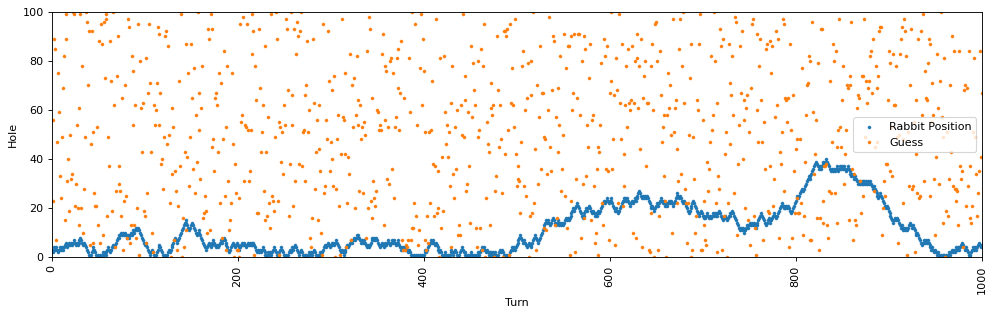

In [142]:
fig = plt.figure(figsize=(15, 10), dpi=80)
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(211)
ax1.set_ylabel('Hole')
ax1.set_xlabel('Turn')
ax = plt.gca()
ax.set_xlim([0, 1000])
ax.set_ylim([0, 100])
plt.xticks(rotation=90)
plt.scatter(x=random_inspect_result["Turn"], y=random_inspect_result["Rabbit Position"], marker=".", linewidths=.1)
plt.scatter(x=random_inspect_result["Turn"], y=random_inspect_result["Guess"], marker=".", linewidths=.1)
classes = ['Rabbit Position', 'Guess']
plt.legend(labels=classes)
plt.show()

#### Stay Method

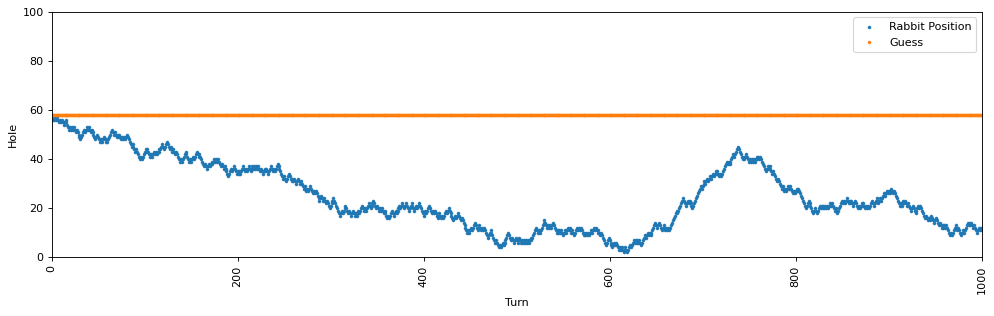

In [141]:
fig = plt.figure(figsize=(15, 10), dpi=80)
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(211)
ax1.set_ylabel('Hole')
ax1.set_xlabel('Turn')
ax = plt.gca()
ax.set_xlim([0, 1000])
ax.set_ylim([0, 100])
plt.xticks(rotation=90)
plt.scatter(x=stay_result["Turn"], y=stay_result["Rabbit Position"], marker=".", linewidths=.1)
plt.scatter(x=stay_result["Turn"], y=stay_result["Guess"], marker=".", linewidths=.1)
classes = ['Rabbit Position', 'Guess']
plt.legend(labels=classes)
plt.show()

#### Random Inspect Method with Optimal Start

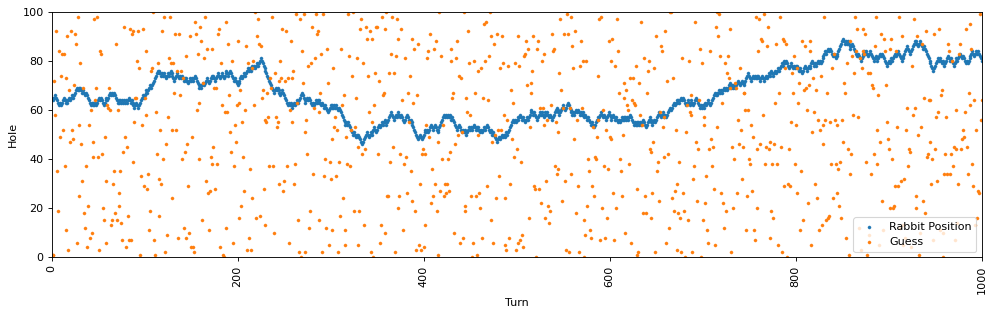

In [140]:
fig = plt.figure(figsize=(15, 10), dpi=80)
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(211)
ax1.set_ylabel('Hole')
ax1.set_xlabel('Turn')
ax = plt.gca()
ax.set_xlim([0, 1000])
ax.set_ylim([0, 100])
plt.xticks(rotation=90)
plt.scatter(x=random_with_optimal_start_result["Turn"], y=random_with_optimal_start_result["Rabbit Position"], marker=".", linewidths=.1)
plt.scatter(x=random_with_optimal_start_result["Turn"], y=random_with_optimal_start_result["Guess"], marker=".", linewidths=.1)
classes = ['Rabbit Position', 'Guess']
plt.legend(labels=classes)
plt.show()

#### Optimal Start Binary Oscillation

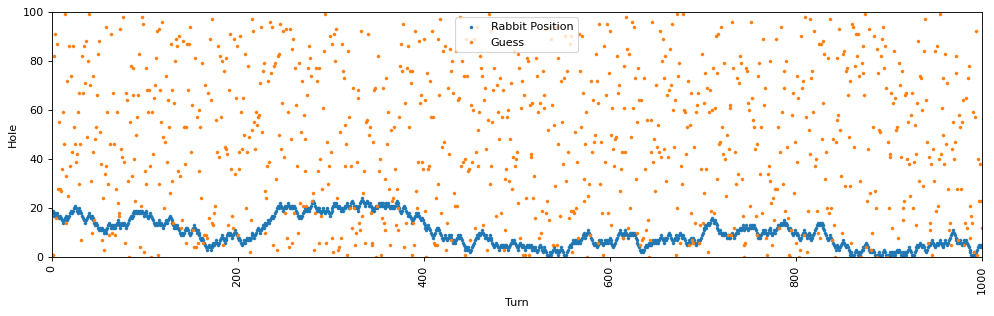

In [139]:
fig = plt.figure(figsize=(15, 10), dpi=80)
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(211)
ax1.set_ylabel('Hole')
ax1.set_xlabel('Turn')
ax = plt.gca()
ax.set_xlim([0, 1000])
ax.set_ylim([0, 100])
plt.xticks(rotation=90)
plt.scatter(x=optimal_start_binary_oscillation_result["Turn"], y=optimal_start_binary_oscillation_result["Rabbit Position"], marker=".", linewidths=.1)
plt.scatter(x=optimal_start_binary_oscillation_result["Turn"], y=optimal_start_binary_oscillation_result["Guess"], marker=".", linewidths=.1)
classes = ['Rabbit Position', 'Guess']
plt.legend(labels=classes)
plt.show()